# Processing images with realvalued Gabor filters

The __Gabor__ filter is a linear filter whose kernel is a 2D Gaussian modulated with a cosine wave. The kernel can be obtained using the `cv2.getGaborKernel` function, which takes such parameters as kernel size, __Gaussian__ standard deviation, wave orientation, wave length, spatial ratio, and phase. One of the areas where __Gabor__ filters are useful is detecting edges of known orientation.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: float32
[ 0.6627451 0.6627451 0.65882355 0.654902 0.6627451 0.6431373 0.6666667 ]


<Figure size 432x432 with 0 Axes>

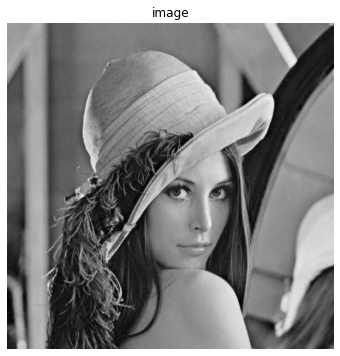

In [2]:
image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255


##############################################
print_image('Original','image',image,0,1,0,7)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image]    ])

------  kernel_getGaborKernel----    Shape(21, 21) kernel_getGaborKernel: float32
[ -0.37308985 -0.14046353 0.1565511 0.45335904 0.6814886 0.7918417 0.77046597 ]
[ 0.019351896 0.321392 0.62086797 0.84635997 0.94363874 0.89464295 0.7224955 ]
[ 0.4382576 0.7183911 0.9242561 1.0 0.9242561 0.7183911 0.4382576 ]
[ 0.7224955 0.89464295 0.94363874 0.84635997 0.62086797 0.321392 0.019351896 ]
[ 0.77046597 0.7918417 0.6814886 0.45335904 0.1565511 -0.14046353 -0.37308985 ]


<Figure size 432x432 with 0 Axes>

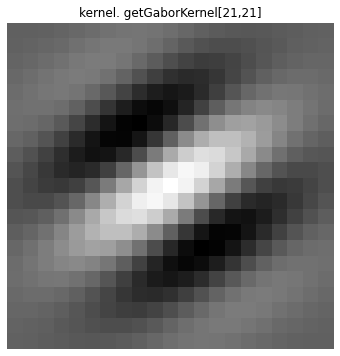

In [3]:
kernel = cv2.getGaborKernel((21, 21), 5, 1, 10, 1, 0, cv2.CV_32F)

kernel_getGaborKernel = np.copy(kernel)



#############################################
print_image('kernel_getGaborKernel','kernel_getGaborKernel',kernel_getGaborKernel,8,13,7,14)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["kernel. getGaborKernel[21,21]",kernel_getGaborKernel] ])

------  kernel_getGaborKernel----    Shape(21, 21) kernel_getGaborKernel: float32
[ -0.5185422 -0.501182 -0.37308985 -0.14046353 0.1565511 0.45335904 0.6814886 ]
[ -0.362311 -0.22108878 0.019351896 0.321392 0.62086797 0.84635997 0.94363874 ]
[ -0.076589905 0.15340954 0.4382576 0.7183911 0.9242561 1.0 0.9242561 ]
[ 0.23266575 0.48076817 0.7224955 0.89464295 0.94363874 0.84635997 0.62086797 ]
[ 0.44909674 0.64028126 0.77046597 0.7918417 0.6814886 0.45335904 0.1565511 ]
------  kernel*kernel------------    Shape(21, 21) kernel_getGaborKernel_square: float32
[ 0.26888597 0.25118342 0.13919604 0.019730004 0.024508245 0.20553441 0.46442667 ]
[ 0.13126926 0.04888025 0.00037449587 0.103292815 0.38547704 0.7163252 0.89045405 ]
[ 0.0058660135 0.023534488 0.19206972 0.5160858 0.8542493 1.0 0.8542493 ]
[ 0.05413335 0.23113804 0.5219997 0.800386 0.89045405 0.7163252 0.38547704 ]
[ 0.20168789 0.4099601 0.5936178 0.62701327 0.46442667 0.20553441 0.024508245 ]
[kernel*kernel].sum() == 39.04178
math.sq

<Figure size 720x432 with 0 Axes>

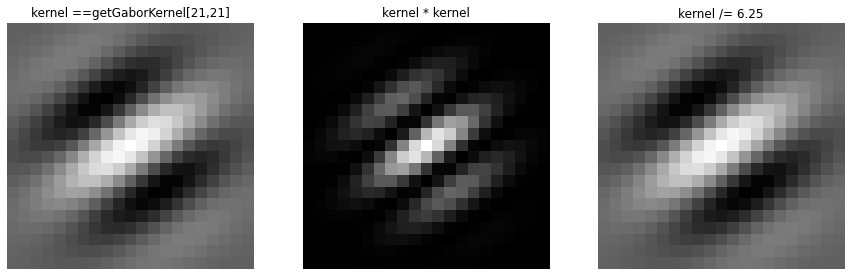

In [4]:
kernel /= math.sqrt((kernel * kernel).sum())

kernel_getGaborKernel_square = kernel_getGaborKernel * kernel_getGaborKernel


###############################################
print_image('kernel_getGaborKernel','kernel_getGaborKernel',kernel_getGaborKernel,8,13,7,14)
print_image('kernel*kernel','kernel_getGaborKernel_square',kernel_getGaborKernel_square,8,13,7,14)

print("[kernel*kernel].sum() ==",kernel_getGaborKernel_square.sum())
print("math.sqrt((kernel * kernel).sum()) ==",math.sqrt(kernel_getGaborKernel_square.sum()))

print_image('kernel','kernel',kernel,8,13,5,12)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["kernel ==getGaborKernel[21,21]",kernel_getGaborKernel],
                    ["kernel * kernel",kernel_getGaborKernel_square],
                    ["kernel /= 6.25",kernel]
                   ])

In [5]:
image_filtered = cv2.filter2D(image, -1, kernel)



######################################################
print_image('image','image',image,265,270,270,277)
print_image('image_filtered','image_filtered',image_filtered,265,270,270,277)

------  image--------------------    Shape(512, 512) image: float32
[ 0.25882354 0.32156864 0.64705884 0.8039216 0.8039216 0.78431374 0.7607843 ]
[ 0.26666668 0.2901961 0.627451 0.8039216 0.8039216 0.78431374 0.78431374 ]
[ 0.2509804 0.3647059 0.69803923 0.8117647 0.8039216 0.8039216 0.8117647 ]
[ 0.2901961 0.5058824 0.77254903 0.8235294 0.8117647 0.81960785 0.827451 ]
[ 0.4627451 0.68235296 0.8117647 0.8235294 0.8235294 0.83137256 0.83137256 ]
------  image_filtered-----------    Shape(512, 512) image_filtered: float32
[ -0.31138134 -0.27858508 -0.1931618 -0.07991122 0.03275373 0.12723893 0.19402733 ]
[ -0.38606426 -0.3063162 -0.1719354 -0.015062152 0.12975004 0.23889601 0.30887398 ]
[ -0.4061418 -0.25401193 -0.0588139 0.1417886 0.31065404 0.4216058 0.47805274 ]
[ -0.28087586 -0.05399183 0.18602274 0.40062544 0.5580066 0.63749915 0.6501968 ]
[ 0.011593563 0.281961 0.5227997 0.70207 0.80144286 0.81377953 0.7572433 ]


<Figure size 720x432 with 0 Axes>

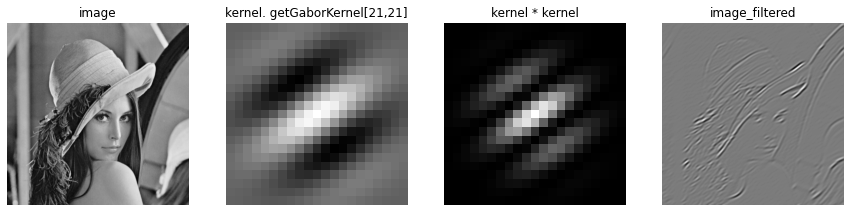

In [6]:
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["kernel. getGaborKernel[21,21]",kernel],
                    ["kernel * kernel",kernel_getGaborKernel_square],
                    ["image_filtered",image_filtered]
                   ])

cv2.imshow('image, image_filtered', np.hstack([image, image_filtered]))
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 720x432 with 0 Axes>

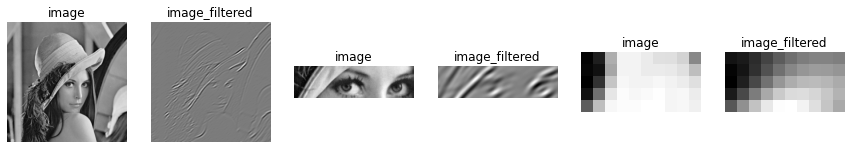

In [7]:
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["image_filtered",image_filtered],
                    ["image",image[240:280,200:350]],
                    ["image_filtered",image_filtered[240:280,200:350]],
                    ["image",image[265:270,270:280]],
                    ["image_filtered",image_filtered[265:270,270:280]]
                   ])

cv2.imshow('image, image_filtered', np.hstack([image[240:280,200:350], image_filtered[240:280,200:350]]))
cv2.waitKey()
cv2.destroyAllWindows()